# HomeMade PCA 불러오기

In [1]:
from tool import handmade_pca

Handmade PCA가 초기화 되었습니다.
pandas 라이브러리를 불러온 후, 'data = pandas.read_csv(데이터 경로)' 코드를 통해 데이터를 준비해주세요.
데이터를 준비했다면, 'pca = handmade_pca(data)' 코드를 통해 분석을 시작해주세요.


# 필요 라이브러리 추가로 불러오기

In [2]:
import pandas as pd # as를 통해 패키지명 축약 가능

# HandMade PCA 이용하여 분석 진행

## 용해탱크 데이터

### Pandas를 통해 데이터 준비하기

In [3]:
melting_tank_data = pd.read_csv('./dataset/gen/melting_tank.csv')

In [4]:
pd.set_option('display.max_columns', 50) # 컬럼 생략없이 데이터 프레임 확인 가능
melting_tank_data

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


### 전처리 및 시각화 진행

In [5]:
melting_tank_pca = handmade_pca(melting_tank_data)

변수:
1 STD_DT
2 NUM
3 MELT_TEMP
4 MOTORSPEED
5 MELT_WEIGHT
6 INSP
7 TAG

'.하나 이상의 독립변수와 종속변수 하나를 지정해주세요.
위의 보기를 확인하고 독립변수들의 번호를 x, 종속변수의 번호를 y에 넣어주세요.

***독립변수 선택이 어렵다면 날짜, 번호 관련 변수를 제외하고 모두 선택해주세요.***

지정 후, .set_data()를 통해 분석을 위한 데이터를 생성해주세요.
wnex1) x: 1 2 3 4 5 8 9 10 / y = 46
ex2) x: 1:5 8:10 / y = 46
ex3) x: 1:5 8 9 10 / y = 46
x: 3:6
y: 7


In [6]:
melting_tank_pca.set_data()

데이터 불균형이 존재합니다. '.smote()'를 통해 데이터 불균형을 해소하세요
SMOTE는 최근접 이웃(k-NN) 알고리즘을 기반으로 하여 데이터를 새로 생성해 종속변수 데이터가 같은 비율을 갖게 하는 알고리즘 입니다.


,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489,116,631,3.19,OK
1,433,78,609,3.19,OK
2,464,154,608,3.19,OK
3,379,212,606,3.19,OK
4,798,1736,604,3.21,OK
...,...,...,...,...,...
835195,755,1743,318,3.21,OK
835196,385,206,317,3.19,OK
835197,465,148,316,3.20,OK
835198,467,0,314,3.19,OK


In [7]:
melting_tank_pca.smote()

기존 데이터 형태:  (835200, 4) (835200,)
SMOTE 적용 후 데이터 형태:  (1316266, 4) (1316266,)
SMOTE 적용 후 종속변수 데이터 분포: 
 OK    658133
NG    658133
Name: count, dtype: int64

데이터 불균형이 해소 되었습니다. '.pca()'를 통해 주성분분석을 진행하세요.


,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,489.000000,116.000000,631.000000,3.190000,OK
1,433.000000,78.000000,609.000000,3.190000,OK
2,464.000000,154.000000,608.000000,3.190000,OK
3,379.000000,212.000000,606.000000,3.190000,OK
4,798.000000,1736.000000,604.000000,3.210000,OK
...,...,...,...,...,...
1316261,435.955279,67.955279,647.910559,3.199553,NG
1316262,415.020170,72.020170,496.080680,3.190000,NG
1316263,444.306938,172.043316,1696.870051,3.190000,NG
1316264,341.880105,240.940053,89.760210,3.186467,NG


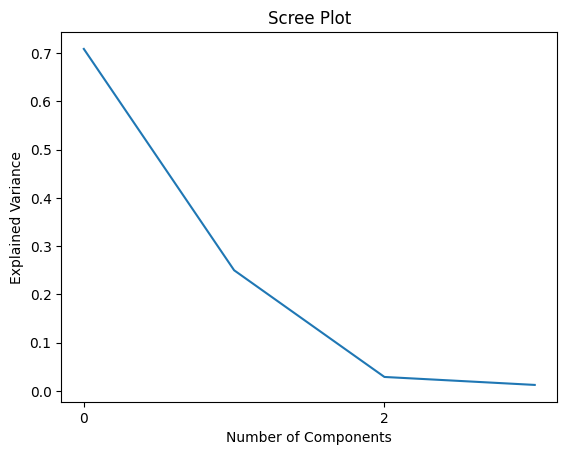

               PC1       PC2       PC3       PC4
고유값       2.832892  0.050581  0.116530  1.000001
기여율(설명력)  0.708222  0.250000  0.029132  0.012645
누적 기여율    0.708222  0.958222  0.987355  1.000000

위의 'Scree Plot'과 표를 참고하여 주성분 개수를 입력해주세요.
일반적으로 Scree Plot의 기울기가 완만해지는 시점이나 누적 기여율이 80%~90%인 시점에서 주성분 개수를 결정합니다.
추천 주성분 개수: 2
주성분 개수: 2

시각화가 가능합니다. '.pca_visualize(dimension='2d')'을 통해 확인 가능합니다.
주성분 설정이 끝났습니다. 'train_split()'을 통해 학습용 데이터를 생성해주세요.


,PC1,PC2,TAG
0,-0.636799,0.039311,OK
1,-0.925746,0.021330,OK
2,-0.716158,0.020482,OK
3,-1.050280,0.019017,OK
4,3.197611,0.017387,OK
...,...,...,...
835195,3.008427,-0.217419,OK
835196,-1.028400,-0.218348,OK
835197,-0.233770,-0.219244,OK
835198,-0.841566,-0.221041,OK


In [8]:
melting_tank_pca.pca()

이제 'train_split()'을 통해 학습용 데이터를 생성해주세요.


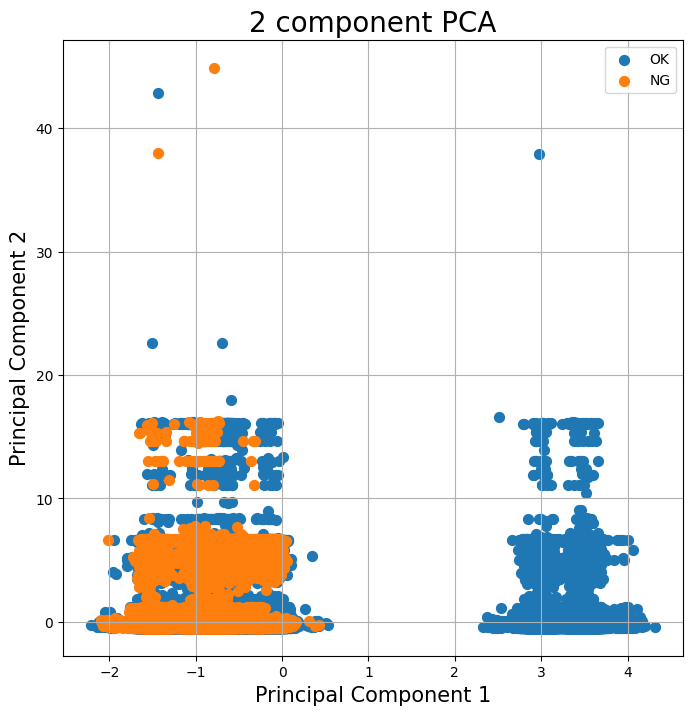

In [9]:
melting_tank_pca.pca_visualize(dimension='2d')

In [10]:
melting_tank_pca.train_split()

원하는 훈련용/검증용/시험용 데이터 비율을 입력해주세요. (추천: 0.6 0.2 0.2)
0.6 0.2 0.2
학습용 데이터 수: 501120
검증용 데이터 수: 167040
시험용 데이터 수: 167040
데이터 분할을 완료했습니다. '.model_kind'를 통해 활용 가능한 모델을 확인해주세요.


In [11]:
melting_tank_pca.model_kind

{'.dnn()': '딥러닝 모델', '.random_forest()': '랜덤포레스트 모델'}

## CNC 데이터

### Pandas를 통해 데이터 준비하기

In [12]:
cnc_data = pd.read_csv('./dataset/gen/data.csv')

In [13]:
pd.set_option('display.max_columns', 50) # 컬럼 생략없이 데이터 프레임 확인 가능
melting_tank_data

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


### 전처리 및 시각화 진행

In [14]:
cnc_pca = handmade_pca(cnc_data)

변수:
1 X_ActualPosition
2 X_ActualVelocity
3 X_ActualAcceleration
4 X_SetPosition
5 X_SetVelocity
6 X_SetAcceleration
7 X_CurrentFeedback
8 X_DCBusVoltage
9 X_OutputCurrent
10 X_OutputVoltage
11 X_OutputPower
12 Y_ActualPosition
13 Y_ActualVelocity
14 Y_ActualAcceleration
15 Y_SetPosition
16 Y_SetVelocity
17 Y_SetAcceleration
18 Y_CurrentFeedback
19 Y_DCBusVoltage
20 Y_OutputCurrent
21 Y_OutputVoltage
22 Y_OutputPower
23 Z_ActualPosition
24 Z_ActualVelocity
25 Z_ActualAcceleration
26 Z_SetPosition
27 Z_SetVelocity
28 Z_SetAcceleration
29 Z_CurrentFeedback
30 Z_DCBusVoltage
31 Z_OutputCurrent
32 Z_OutputVoltage
33 S_ActualPosition
34 S_ActualVelocity
35 S_ActualAcceleration
36 S_SetPosition
37 S_SetVelocity
38 S_SetAcceleration
39 S_CurrentFeedback
40 S_DCBusVoltage
41 S_OutputCurrent
42 S_OutputVoltage
43 S_OutputPower
44 S_SystemInertia
45 M_CURRENT_FEEDRATE
46 error

'.하나 이상의 독립변수와 종속변수 하나를 지정해주세요.
위의 보기를 확인하고 독립변수들의 번호를 x, 종속변수의 번호를 y에 넣어주세요.

***독립변수 선택이 어렵다면 날짜, 번호 관련 변수를 제외하고 모두 선

In [15]:
cnc_pca.set_data()

데이터 불균형이 존재합니다. '.smote()'를 통해 데이터 불균형을 해소하세요
SMOTE는 최근접 이웃(k-NN) 알고리즘을 기반으로 하여 데이터를 새로 생성해 종속변수 데이터가 같은 비율을 갖게 하는 알고리즘 입니다.


,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,X_OutputPower,Y_ActualPosition,Y_ActualVelocity,Y_ActualAcceleration,Y_SetPosition,Y_SetVelocity,Y_SetAcceleration,Y_CurrentFeedback,Y_DCBusVoltage,Y_OutputCurrent,Y_OutputVoltage,Y_OutputPower,Z_ActualPosition,Z_ActualVelocity,Z_ActualAcceleration,Z_SetPosition,Z_SetVelocity,Z_SetAcceleration,Z_CurrentFeedback,Z_DCBusVoltage,Z_OutputCurrent,Z_OutputVoltage,S_ActualPosition,S_ActualVelocity,S_ActualAcceleration,S_SetPosition,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
0,202.0,4.0000,4.00,202.0,4.0,4.000000,0.180,0.0207,329,2.77,-1.420000e-06,162.0,3.9750,-2.250,162.0,4.0,4.000000,0.5390,0.0167,328,1.84,6.430000e-07,123.00,4.0000,4.000,123.00,4.0,4.000000,0,0,0,0,-357.0,4.001000,4.2500,-357.0,4.00,4.0,0.524,2.740000e-19,329,0.0,6.960000e-07,16.0,50,0
1,202.0,-6.8000,-346.00,202.0,-9.6,-354.000000,-10.900,0.1860,328,23.30,4.480000e-03,162.0,-15.8000,-746.000,161.0,-20.6,-643.000000,-14.5000,0.2810,325,37.80,1.260000e-02,123.00,-16.3000,-708.000,122.00,-21.6,-670.000000,0,0,0,0,-357.0,4.000000,4.2500,-357.0,4.00,4.0,-0.288,2.740000e-19,328,0.0,-5.270000e-07,16.0,50,0
2,200.0,-13.8000,-2.25,200.0,-13.9,3.999905,-8.590,0.1400,328,30.60,5.330000e-03,158.0,-28.5000,4.000,158.0,-28.3,3.999905,-7.7900,0.1390,327,49.40,9.430000e-03,119.00,-29.7000,41.500,119.00,-29.7,3.999905,0,0,0,0,-357.0,4.000000,3.5620,-357.0,4.00,4.0,0.524,2.740000e-19,328,0.0,9.100000e-07,16.0,50,0
3,198.0,-14.0000,4.00,198.0,-13.9,3.999905,-6.110,0.1300,327,30.30,4.890000e-03,155.0,-28.6000,-58.500,155.0,-28.3,3.999905,-8.1300,0.1560,325,47.60,1.050000e-02,116.00,-29.7000,-2.250,116.00,-29.7,4.000000,0,0,0,0,-357.0,3.999000,3.7500,-357.0,4.00,4.0,-0.180,2.740000e-19,328,0.0,1.070000e-06,16.0,50,0
4,197.0,-13.9000,-14.80,196.0,-13.9,4.000095,-5.700,0.1140,328,30.50,4.250000e-03,152.0,-28.0000,142.000,152.0,-28.3,4.000095,-13.8000,0.2020,326,47.10,1.350000e-02,113.00,-29.6000,22.800,112.00,-29.7,4.000000,0,0,0,0,-357.0,4.000000,3.8120,-357.0,4.00,4.0,0.226,2.740000e-19,328,0.0,1.960000e-06,16.0,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,179.0,3.5625,8.15,179.0,3.5,5.000000,-0.941,0.0215,328,1.79,0.000000e+00,120.5,4.9875,-4.400,120.5,5.0,5.000000,0.0535,0.0153,326,1.66,6.120000e-07,78.75,5.0250,14.375,78.75,5.0,5.000000,0,0,0,0,-857.5,31.649500,14.8565,-857.0,31.65,5.0,0.244,2.770000e-19,328,0.0,-3.020000e-06,17.0,20,0
32044,178.5,3.5350,30.00,178.5,3.5,5.000000,-0.780,0.0202,328,1.07,1.330000e-06,120.5,5.0250,14.400,120.5,5.0,5.000000,0.0625,0.0183,327,0.91,-1.560000e-06,78.75,5.0250,14.375,78.75,5.0,5.000000,0,0,0,0,-852.0,31.750000,29.2810,-851.5,31.65,5.0,0.244,2.770000e-19,328,0.0,0.000000e+00,17.0,20,0
32045,178.5,3.5475,17.50,178.5,3.5,5.000000,0.501,0.0190,328,0.99,-5.650000e-08,120.5,5.0125,11.250,120.5,5.0,5.000000,-0.7320,0.0167,327,2.05,0.000000e+00,78.75,4.9875,5.000,78.75,5.0,5.000000,0,0,0,0,-854.5,31.650375,-2.2125,-854.5,31.65,5.0,0.128,2.770000e-19,328,0.0,0.000000e+00,17.0,20,0
32046,178.5,3.4475,11.25,178.5,3.5,5.000000,-0.298,0.0193,328,1.37,-4.700000e-08,120.5,4.9750,-1.275,120.5,5.0,5.000000,-0.7310,0.0194,326,3.13,8.840000e-07,78.75,5.0125,11.250,78.75,5.0,5.000000,0,0,0,0,-849.5,31.599625,-9.9375,-849.0,31.65,5.0,0.657,2.770000e-19,328,0.0,-7.980000e-06,17.0,20,0


In [16]:
cnc_pca.smote()

기존 데이터 형태:  (32048, 45) (32048,)
SMOTE 적용 후 데이터 형태:  (45290, 45) (45290,)
SMOTE 적용 후 종속변수 데이터 분포: 
 0    22645
1    22645
Name: count, dtype: int64

데이터 불균형이 해소 되었습니다. '.pca()'를 통해 주성분분석을 진행하세요.


,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,X_OutputPower,Y_ActualPosition,Y_ActualVelocity,Y_ActualAcceleration,Y_SetPosition,Y_SetVelocity,Y_SetAcceleration,Y_CurrentFeedback,Y_DCBusVoltage,Y_OutputCurrent,Y_OutputVoltage,Y_OutputPower,Z_ActualPosition,Z_ActualVelocity,Z_ActualAcceleration,Z_SetPosition,Z_SetVelocity,Z_SetAcceleration,Z_CurrentFeedback,Z_DCBusVoltage,Z_OutputCurrent,Z_OutputVoltage,S_ActualPosition,S_ActualVelocity,S_ActualAcceleration,S_SetPosition,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
0,202.000000,4.000000,4.000000,202.000000,4.000000,4.000000,0.180000,2.070000e-02,329.000000,2.770000,-0.000001,162.000000,3.975000,-2.250000,162.000000,4.000000,4.000000,0.539000,1.670000e-02,328.000000,1.840000,6.430000e-07,123.000000,4.000000,4.000000,123.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.001000,4.250000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,329.000000,0.000000,6.960000e-07,16.000000,50.000000,0
1,202.000000,-6.800000,-346.000000,202.000000,-9.600000,-354.000000,-10.900000,1.860000e-01,328.000000,23.300000,0.004480,162.000000,-15.800000,-746.000000,161.000000,-20.600000,-643.000000,-14.500000,2.810000e-01,325.000000,37.800000,1.260000e-02,123.000000,-16.300000,-708.000000,122.000000,-21.600000,-670.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,4.250000,-357.000000,4.000000,4.000000,-0.288000,2.740000e-19,328.000000,0.000000,-5.270000e-07,16.000000,50.000000,0
2,200.000000,-13.800000,-2.250000,200.000000,-13.900000,3.999905,-8.590000,1.400000e-01,328.000000,30.600000,0.005330,158.000000,-28.500000,4.000000,158.000000,-28.300000,3.999905,-7.790000,1.390000e-01,327.000000,49.400000,9.430000e-03,119.000000,-29.700000,41.500000,119.000000,-29.700000,3.999905,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.562000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,328.000000,0.000000,9.100000e-07,16.000000,50.000000,0
3,198.000000,-14.000000,4.000000,198.000000,-13.900000,3.999905,-6.110000,1.300000e-01,327.000000,30.300000,0.004890,155.000000,-28.600000,-58.500000,155.000000,-28.300000,3.999905,-8.130000,1.560000e-01,325.000000,47.600000,1.050000e-02,116.000000,-29.700000,-2.250000,116.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,3.999000,3.750000,-357.000000,4.000000,4.000000,-0.180000,2.740000e-19,328.000000,0.000000,1.070000e-06,16.000000,50.000000,0
4,197.000000,-13.900000,-14.800000,196.000000,-13.900000,4.000095,-5.700000,1.140000e-01,328.000000,30.500000,0.004250,152.000000,-28.000000,142.000000,152.000000,-28.300000,4.000095,-13.800000,2.020000e-01,326.000000,47.100000,1.350000e-02,113.000000,-29.600000,22.800000,112.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.812000,-357.000000,4.000000,4.000000,0.226000,2.740000e-19,328.000000,0.000000,1.960000e-06,16.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,164.875376,5.184075,-24.003208,164.875376,5.219789,5.000000,2.050301,4.434864e-02,324.853474,5.462039,-0.000013,106.293052,1.391298,216.531350,106.293052,1.344413,5.000000,-5.416009,1.297734e-01,322.853474,17.741845,2.360077e-03,34.612085,4.975000,-1.707893,34.612085,5.000000,5.000000,0.0,0.0,0.0,0.0,-58.192587,58.221979,-59.170377,-57.851197,58.300000,5.000000,23.687915,9.722357e-01,320.706948,117.853474,1.870076e-01,17.000000,8.051361,1
45286,159.186290,-3.830530,-971.445575,159.186290,-5.779435,5.000000,-18.032339,2.918823e-01,324.203428,25.682862,0.006026,101.897175,5.064400,38.461344,101.897175,5.000000,5.000000,2.536376,6.012520e-02,323.203428,3.586788,-1.710079e-05,34.496572,5.000000,5.000000,34.496572,5.000000,5.000000,0.0,0.0,0.0,0.0,893.610283,58.320343,2.842464,89

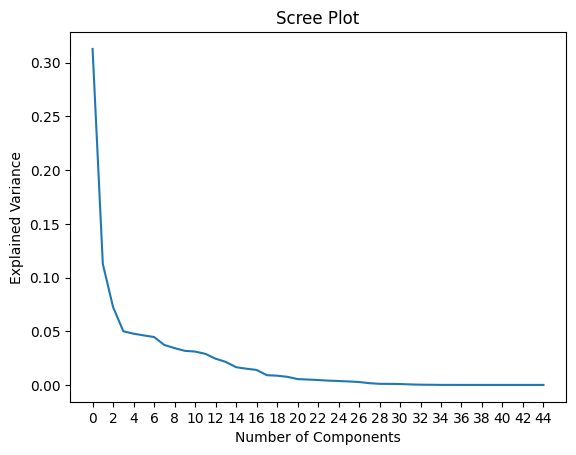

                PC1       PC2       PC3       PC4       PC5       PC6   
고유값       12.825277  4.616295  2.971057  2.047795  1.955519  1.889413  \
기여율(설명력)   0.312802  0.112589  0.072463  0.049945  0.047694  0.046082   
누적 기여율     0.312802  0.425391  0.497853  0.547798  0.595492  0.641574   

               PC7       PC8       PC9      PC10      PC11      PC12   
고유값       1.828079  1.524470  1.405183  1.301674  1.273185  1.187135  \
기여율(설명력)  0.044586  0.037181  0.034272  0.031747  0.031052  0.028954   
누적 기여율    0.686160  0.723341  0.757613  0.789360  0.820412  0.849366   

              PC13      PC14      PC15      PC16      PC17      PC18   
고유값       1.001679  0.879074  0.677499  0.619903  0.571958  0.372542  \
기여율(설명력)  0.024430  0.021440  0.016524  0.015119  0.013950  0.009086   
누적 기여율    0.873796  0.895236  0.911760  0.926879  0.940829  0.949915   

              PC19      PC20      PC21      PC22      PC23      PC24   
고유값       0.352256  0.310291  0.222671  0.206213  0.18657

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,error
0,-6.920456,-0.309659,0.620376,-0.173493,-0.049716,-0.827077,-0.755800,-0.183709,-0.067757,0.027895,0.004604,0
1,-4.784892,12.362209,-0.183397,-3.429480,-4.420039,-12.117535,11.793943,-2.896079,3.264822,-9.407834,0.229008,0
2,-5.282790,13.396142,-1.747859,-0.250573,0.295721,-0.676484,-1.421395,-0.214001,0.038887,0.191528,0.345224,0
3,-4.853765,13.562954,-1.445539,-0.543882,0.085106,-1.036812,-1.114130,-0.479233,0.068567,-0.079483,0.142380,0
4,-4.863956,14.065084,-1.475915,-0.531384,0.383110,-0.455775,-1.290182,1.001210,-0.026898,0.236973,-0.160512,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32043,-3.684435,-0.846092,-0.169289,0.188418,-0.500449,0.441178,0.123107,-0.031321,0.016585,-0.229498,0.349687,0
32044,-3.783528,-0.937229,-0.223211,0.166718,-0.471464,0.534305,0.175168,0.012774,-0.090585,-0.020019,0.569396,0
32045,-3.789268,-0.897574,-0.105570,-0.057159,-0.465563,0.547822,0.263291,0.132623,-0.167974,-0.158718,0.112825,0
32046,-3.655781,-0.775286,-0.104323,0.051836,-0.468393,0.487788,0.164212,0.043112,-0.108389,-0.319969,-0.040805,0


In [17]:
cnc_pca.pca()

In [18]:
cnc_pca.train_split()

원하는 훈련용/검증용/시험용 데이터 비율을 입력해주세요. (추천: 0.6 0.2 0.2)
0.6 0.2 0.2
학습용 데이터 수: 19228
검증용 데이터 수: 6410
시험용 데이터 수: 6410
데이터 분할을 완료했습니다. '.model_kind'를 통해 활용 가능한 모델을 확인해주세요.


In [19]:
cnc_pca.model_kind

{'.dnn()': '딥러닝 모델', '.random_forest()': '랜덤포레스트 모델'}

# 업데이트 예정..